# Project: Investigate a Dataset of How People Live Their Lives in Different Countries.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#statistical">Statistical Tests</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset selected for this analysis is provided by Gapminder World and displays information regarding how people live their lives in different countries. There are several indicators available, and in this analysis, three were selected: Life Expectancy in years, Child mortality per 1000 born and income per person in dollars. The following questions will be addressed after the Assessing and Cleaning data processes. 
 - What is the correlation between Life Expectancy and Child Mortality? 
 - How did Child Mortality evolve in the six continents? 
 - Which continent has the lowest percentage change in Child Mortality? 
 - What is the correlation between Life Expectancy and Income Per Person? 
 - How Income Per Person evolve in Europe in comparison to the Americas?
 - By how much did Child Mortality reduce in the Americas. 



In [1370]:
# Packages imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### CSV import for each variable and country selection.

In [1021]:
# Dataset imports 
df_le = pd.read_csv('Dataset/life_expectancy_years.csv')
df_cm = pd.read_csv('Dataset/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df_gdp = pd.read_csv('Dataset/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

# Select a specific country.
select = "Australia"

country_le = df_le.query('country == @select')
country_cm = df_cm.query('country == @select')
country_gdp = df_gdp.query('country == @select')


### Transposing the dataframes of each variable.
>It was necessary to transpose each dataframe so the years could be set as a new column by resetting the index. The first line of the data frame was then dropped because it contains the country label and the selected country, an inconsistency after transposing. Columns were then renamed, and the column "year" converted from string to integer so it could be used to filter the years. 

In [1022]:
# Transpose the dataframe.
country_le = country_le.transpose()
country_cm = country_cm.transpose()
country_gdp = country_gdp.transpose()

# Drop dataframe's first line. 
country_le.drop(['country'], axis=0, inplace = True)
country_cm.drop(['country'], axis=0, inplace = True)
country_gdp.drop(['country'], axis=0, inplace = True)

# Reset dataframe's index.
country_le = country_le.reset_index()
country_cm = country_cm.reset_index()
country_gdp = country_gdp.reset_index()

# Rename columns.
country_le.columns = ['year','life_expectancy']
country_cm.columns = ['year','child_mortality']
country_gdp.columns = ['year','income_per_person']

# Convert Year (string) to Int
country_le['year'] = country_le['year'].astype(int)
country_cm['year'] = country_cm['year'].astype(int)
country_gdp['year'] = country_gdp['year'].astype(int)


### Selecting years range from 1900 to 2010. 
>The amount of data used in this analysis is based on 100 years range, from 1910 to 2010. 

In [1023]:
# Select a range of years. 
country_le = country_le[(country_le.year > 1909) & (country_le.year < 2011)]
country_cm = country_cm[(country_cm.year > 1909) & (country_cm.year < 2011)]
country_gdp = country_gdp[(country_gdp.year > 1909) & (country_gdp.year < 2011)]

### Merging all variables dataframes.
>Each data frame contains one variable to be used in further analysis. The merging process aims to put those variables together in the same data frame.


In [1024]:
# Merging the dataframes
country = country_le.merge(country_cm, left_on = 'year', right_on = 'year')
country = country.merge(country_gdp, left_on = 'year', right_on = 'year')


### Missing Values and Duplicates

In [1025]:
# Check duplicated values.
print(country.duplicated().sum())

# Check missing values.
country.info()

0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               101 non-null    int64 
 1   life_expectancy    101 non-null    object
 2   child_mortality    101 non-null    object
 3   income_per_person  101 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.9+ KB


### Data Types Verification

In [1026]:
# Data Types verification - Correct Datatypes accordingly to each information.

print(type(country['year'][0]))
print(type(country['life_expectancy'][0]))
print(type(country['child_mortality'][0]))
print(type(country['income_per_person'][0]))


<class 'numpy.int64'>
<class 'float'>
<class 'float'>
<class 'int'>


### Adding country column and saving country dataframe to final name.

In [1055]:
# Adding country column 
country['country'] = select

# Save dataframe to final name and preview it. 
select.lower()

d = {}
australia = country

country.to_csv('{}.csv'.format(select))
country.head()

,year,life_expectancy,child_mortality,income_per_person,country
0,1910,55.3,105,9470,Australia
1,1911,55.8,93.6,9270,Australia
2,1912,56.4,100,9260,Australia
3,1913,56.9,100,9370,Australia
4,1914,57.4,98.5,9130,Australia


### Loading and concatenating country data frames

In [1252]:
# Load data frames.

# List all the specific countries selected at the beginning. 
countries = ['angola', 'argentina', 'australia', 'brazil', 'cameroon', 'china', 'egypt', 'france', 'finland', 'germany', 'italy', 'japan', 'mexico', 'south_africa', 'spain', 'usa']

frames = [angola, argentina, australia, brazil, cameroon, china, egypt, france, finland, germany, italy, japan, mexico, south_africa, spain, usa]

# Concatenate countries frames.
df_countries = pd.concat(frames)

# Drop column continent if exists (re-running issue). 
if 'continent' in df_countries.columns:
    df_countries.drop('continent', axis=1, inplace=True)

print(df_countries.head(10))
print(df_countries.shape)



   year life_expectancy child_mortality income_per_person country
0  1910            29.7             477              1000  Angola
1  1911            29.8             476              1010  Angola
2  1912            29.9             475              1010  Angola
3  1913            29.9             474              1010  Angola
4  1914              30             473              1050  Angola
5  1915            30.1             471              1080  Angola
6  1916            30.1             470              1110  Angola
7  1917            30.2             469              1140  Angola
8  1918            11.7             468              1170  Angola
9  1919            30.4             467              1210  Angola
(1616, 5)


### Adding continent column
> Continents are classified as follows: Asia - 1, Africa - 2, Australia - 3, Europe - 4, South America - 5, North America - 6.

In [1253]:
# Define function 'cont' returning different int for each continent based on countries. 

def cont(c):
    if c['country'] in ['Japan', 'China']:
        return '1'
    elif c['country'] in ['South Africa', 'Egypt', 'Cameroon', 'Angola']:
        return '2'
    elif c['country'] in ['Australia']:
        return '3'    
    elif c['country'] in ['France', 'Finland', 'Germany', 'Spain', 'Italy']:
        return '4' 
    elif c['country'] in ['Brazil', 'Argentina', 'Colombia']:
        return '5'     
    elif c['country'] in ['Mexico', 'United States']:
        return '6'    
    
# Apply the 'cont' function to each row in the data frame.    
df_countries['continent'] = df_countries.apply(cont, axis=1)

df_countries.head()

,year,life_expectancy,child_mortality,income_per_person,country,continent
0,1910,29.7,477,1000,Angola,2
1,1911,29.8,476,1010,Angola,2
2,1912,29.9,475,1010,Angola,2
3,1913,29.9,474,1010,Angola,2
4,1914,30,473,1050,Angola,2


### Final data cleaning

In [1254]:
# Reset index
df_countries = df_countries.reset_index()
df_countries.drop('index', axis=1, inplace=True)

# Verify null values 
print(df_countries.info())

# Save final data frame and preview it. 
df_countries.to_csv('countries.csv')
df_countries.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               1616 non-null   int64 
 1   life_expectancy    1616 non-null   object
 2   child_mortality    1616 non-null   object
 3   income_per_person  1616 non-null   object
 4   country            1616 non-null   object
 5   continent          1616 non-null   object
dtypes: int64(1), object(5)
memory usage: 75.9+ KB
None


,year,life_expectancy,child_mortality,income_per_person,country,continent
0,1910,29.7,477,1000,Angola,2
1,1911,29.8,476,1010,Angola,2
2,1912,29.9,475,1010,Angola,2
3,1913,29.9,474,1010,Angola,2
4,1914,30,473,1050,Angola,2


### Creating continents data frames

In [1348]:
# Create continent separate dataframes. 
asia = df_countries.query('continent == "1"')
africa = df_countries.query('continent == "2"')
australia = df_countries.query('continent == "3"')
europe = df_countries.query('continent == "4"')
s_america = df_countries.query('continent == "5"')
n_america = df_countries.query('continent == "6"')

### Creating variables data frames per continent

In [1349]:
# Group by year, calculate each continent's child mortality mean and,
# reset indexes transforming a series to a data frame. 
asia_cm = asia.groupby(['year']).apply(lambda x: x['child_mortality'].sum()/len(x)).reset_index()
africa_cm = africa.groupby(['year']).apply(lambda x: x['child_mortality'].sum()/len(x)).reset_index()
australia_cm = australia.groupby(['year']).apply(lambda x: x['child_mortality'].sum()/len(x)).reset_index()
europe_cm = europe.groupby(['year']).apply(lambda x: x['child_mortality'].sum()/len(x)).reset_index()
s_america_cm = s_america.groupby(['year']).apply(lambda x: x['child_mortality'].sum()/len(x)).reset_index()
n_america_cm = n_america.groupby(['year']).apply(lambda x: x['child_mortality'].sum()/len(x)).reset_index()

# Group by year, calculate each continent's life expectancy mean and,
# reset indexes transforming a series to a data frame. 
asia_le = asia.groupby(['year']).apply(lambda x: x['life_expectancy'].sum()/len(x)).reset_index()
africa_le = africa.groupby(['year']).apply(lambda x: x['life_expectancy'].sum()/len(x)).reset_index()
australia_le = australia.groupby(['year']).apply(lambda x: x['life_expectancy'].sum()/len(x)).reset_index()
europe_le = europe.groupby(['year']).apply(lambda x: x['life_expectancy'].sum()/len(x)).reset_index()
s_america_le = s_america.groupby(['year']).apply(lambda x: x['life_expectancy'].sum()/len(x)).reset_index()
n_america_le = n_america.groupby(['year']).apply(lambda x: x['life_expectancy'].sum()/len(x)).reset_index()

# Group by year, calculate each continent's income per person mean and,
# reset indexes transforming a series to a data frame. 
asia_gdp = asia.groupby(['year']).apply(lambda x: x['income_per_person'].sum()/len(x)).reset_index()
africa_gdp = africa.groupby(['year']).apply(lambda x: x['income_per_person'].sum()/len(x)).reset_index()
australia_gdp = australia.groupby(['year']).apply(lambda x: x['income_per_person'].sum()/len(x)).reset_index()
europe_gdp = europe.groupby(['year']).apply(lambda x: x['income_per_person'].sum()/len(x)).reset_index()
s_america_gdp = s_america.groupby(['year']).apply(lambda x: x['income_per_person'].sum()/len(x)).reset_index()
n_america_gdp = n_america.groupby(['year']).apply(lambda x: x['income_per_person'].sum()/len(x)).reset_index()

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1  - What is the correlation between Life Expectancy and Child Mortality? 
> Life Expectancy and Child Mortality have a negative correlation. In the graph below, it is possible to visualize that while Life Expectancy has increased in the period, Child Mortality has decreased. 

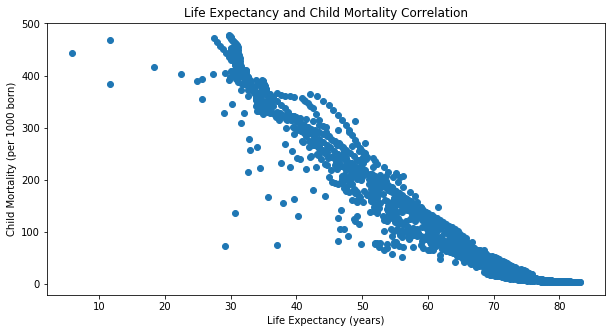

In [1309]:
# Assign life expectancy and child mortality to variables.
le = df_countries['life_expectancy']
cd = df_countries['child_mortality']

plt.figure(figsize=[10,5])
plt.grid(False)
plt.title('Life Expectancy and Child Mortality Correlation')
plt.ylabel('Child Mortality (per 1000 born)')
plt.xlabel('Life Expectancy (years)')

plt.scatter(le,cd);

### Research Question 2  - How did Child Mortality evolve in the six continents? 
> In all continents, Child Mortality has decreased. In the graph below, six moving averages are shown. The orange one is Africa's moving average, the only continent above the 100 child mortality mark. Europe and Australia have the lowest child mortality moving averages in the period. After 1960, Asia's moving average started to decrease faster than the other countries and stabilized in 1980. Australia's moving average is the only one that was never above the 100 child mortality mark. South America, Nouth America and, Europe have similar moving averages, they go smooth without major changes; However, even though North America and South America started at the same point, close to 300 child mortality per 1000 live births, North America rapidly dropped to 250 while South America took more time between 1920 and 1940. 



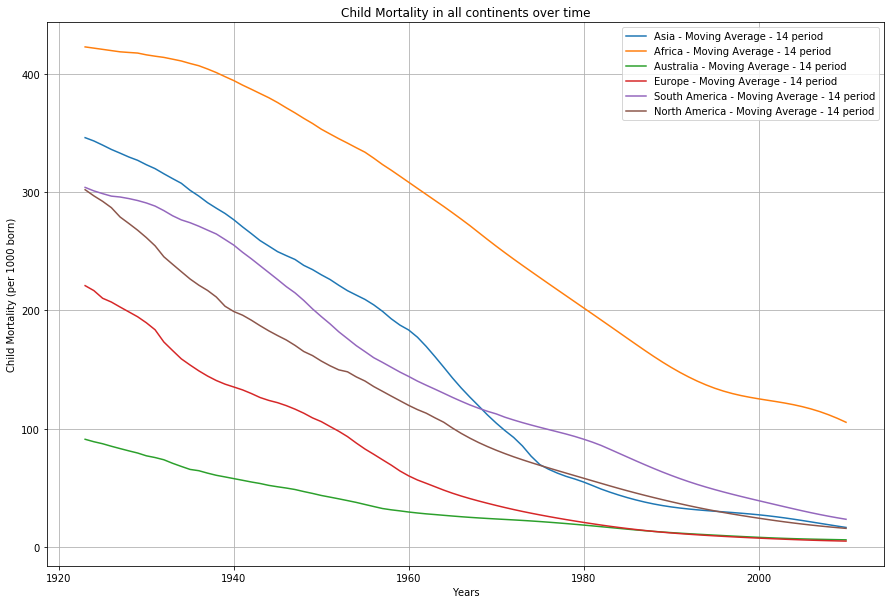

In [1332]:
cont = [asia, africa, australia, europe, s_america, n_america]
cont_cm = [asia_cm, africa_cm, australia_cm, europe_cm, s_america_cm, n_america_cm]

# Drop column moving average if exists (re-running issue).
for c in cont_cm:
    if 'ma14' in c.columns:
        c.drop('ma14', axis=1, inplace=True)

# Rename columns
for c in cont_cm:
    c.columns = ['year','child_mortality']

# Calculate the 14 period moving average for each continent.
for c in cont_cm:
    c['ma14'] = c['child_mortality'].rolling(window=14).mean()

# Use function to avoid Jupyter's automatic ploting.
def graph():
    plt.plot(asia_cm['year'], asia_cm['ma14'], label='Asia - Moving Average - 14 period')
    plt.plot(africa_cm['year'], africa_cm['ma14'], label='Africa - Moving Average - 14 period')
    plt.plot(australia_cm['year'], australia_cm['ma14'], label='Australia - Moving Average - 14 period')
    plt.plot(europe_cm['year'], europe_cm['ma14'], label='Europe - Moving Average - 14 period')
    plt.plot(s_america_cm['year'], s_america_cm['ma14'], label='South America - Moving Average - 14 period')
    plt.plot(n_america_cm['year'], n_america_cm['ma14'], label='North America - Moving Average - 14 period')
    plt.legend(loc='upper right')
                        
plt.figure(figsize=[15,10])
plt.grid(True)
plt.title('Child Mortality in all continents over time')
plt.ylabel('Child Mortality (per 1000 born)')
plt.xlabel('Years')

plt.show(graph())


### Research Question 3   - Which continent has the lowest percentage change in Child Mortality? 
> Africa has the lowest percentage change in Child Mortality. 82% while all other continents are above 90% in percentage change. 

In [1333]:
cont_cm = [asia_cm, africa_cm, australia_cm, europe_cm, s_america_cm, n_america_cm]

asia_cm.name = 'Asia'
africa_cm.name = 'Africa'
australia_cm.name = 'Australia'
europe_cm.name = 'Europe'
s_america_cm.name = 'South America'
n_america_cm.name = 'North America'

x = np.array([])

for c in cont_cm: 
    max_cm = c['child_mortality'].max()
    min_cm = c['child_mortality'].min()*100
    perc_cm = 100 - (min_cm/max_cm)
    x = np.append(x, [c.name, perc_cm], axis=0)

print(x)



['Asia' '97.38651994497937' 'Africa' '82.0430733410943' 'Australia'
 '95.45714285714286' 'Europe' '98.61234745154343' 'South America'
 '94.96960486322189' 'North America' '96.32540861812778']


### Research Question 4 - What is the correlation between Life Expectancy and Income Per Person? 
> Life Expectancy and Income Per Person have a positive correlation. In the graph below, it is possible to visualize that before the 60 years Life Expectancy mark, the correlation is a little positive. After that mark, the positive correlation gets stronger. 

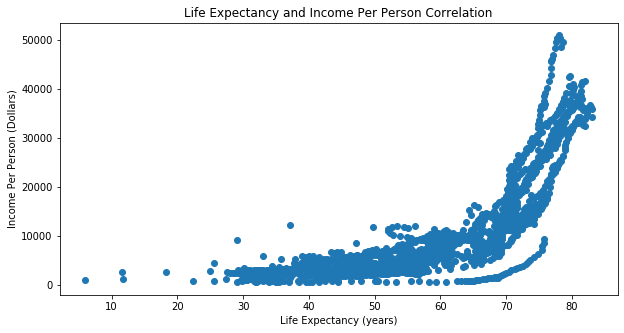

In [1306]:
le = df_countries['life_expectancy']
cd = df_countries['income_per_person']

plt.figure(figsize=[10,5])
plt.grid(False)
plt.title('Life Expectancy and Income Per Person Correlation')
plt.ylabel('Income Per Person (Dollars)')
plt.xlabel('Life Expectancy (years)')


plt.scatter(le, cd);

### Research Question 5  - How Income Per Person evolve in Europe in comparison to the Americas? 
> Until 1960 the Income Per Person was growing at almost the same rate in both Europe and the Americas. After 1960, Europe and the Americas suffered a change in the growth pattern. A strong upper trend can be verified in Europe in this period, on the other hand, in the Americas, the upper trend was smoother. In the year 2000, Europe's Income Per Person was 50% higher than in the Americas. 

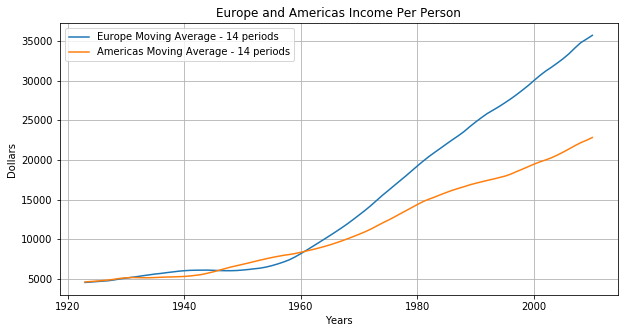

In [1305]:
# Group by year, calculate each continent's child mortality mean and,
# reset indexes transforming a series to a data frame. 
eu = europe.groupby(['year']).apply(lambda x: x['income_per_person'].sum()/len(x)).reset_index()
eu.columns = ['year','income_per_person']

am = americas.groupby(['year']).apply(lambda x: x['income_per_person'].sum()/len(x)).reset_index()
am.columns = ['year','income_per_person']

# Calculate the 14 period moving average for Europe and Americas. 
eu['ma14'] = eu['income_per_person'].rolling(window=14).mean()
am['ma14'] = am['income_per_person'].rolling(window=14).mean()

# Use function to avoid Jupyter's automatic ploting.
def graph():
    plt.plot(eu['year'], eu['ma14'], label='Europe Moving Average - 14 periods')
    plt.plot(eu['year'], am['ma14'], label='Americas Moving Average - 14 periods')
    plt.legend(loc='upper left')

plt.figure(figsize=[10,5])
plt.title('Europe and Americas Income Per Person')
plt.grid(True)
plt.ylabel('Dollars')
plt.xlabel('Years')

plt.show(graph())

### Research Question 6  - By how much have Child Mortality reduced in the Americas?
> Child Mortality has reduced by 98.4 percent in the period. The maximum value was 471 deaths per 1000 live births and the minimum 7.3. 

In [1335]:
americas = df_countries.query('continent == "5" or continent == "6"')

max_cm = americas['child_mortality'].max()
min_cm = americas['child_mortality'].min()*100

perc_cm = 100 - (min_cm / max_cm)

print(max_cm, min_cm/100)

perc_cm

471.0 7.33


98.44373673036094

<a id='statistical'></a>
## Statistical Tests

### Brown-Forsythe test
> Since the data is not normally distributed, as shown below it is skewed to the right, we cannot use Fisher's F-test nor Student's t-test so, Brown-Forsythe test is the chosen one. First, a range of data (interquartile range) is selected, between 25% and 75%. Result: The p-value is smaller than 0.05 so it is statistically significant, the null hypothesis, that there is a relationship between the two variables, is not assumed.

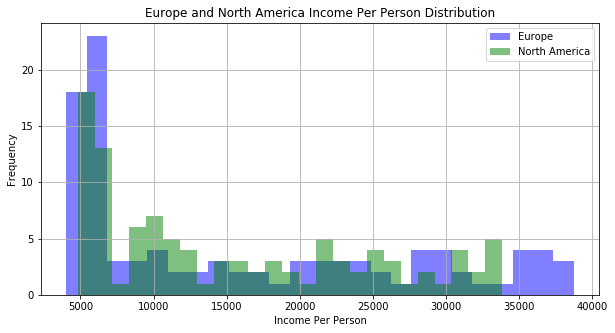

In [1493]:
def graph():
    plt.hist(europe_gdp['income_per_person'], 25, facecolor='b', alpha=0.5, label='Europe')
    plt.hist(n_america_gdp['income_per_person'], 25, facecolor='g', alpha=0.5, label='North America')
    plt.legend(loc='upper right')

plt.figure(figsize=[10,5])
plt.title('Europe and North America Income Per Person Distribution')
plt.grid(True)
plt.ylabel('Frequency')
plt.xlabel('Income Per Person')


plt.show(graph());

In [1459]:
# Use describe to get the 25% and 75% values. 
n_america_gdp['income_per_person'].describe()
europe_gdp['income_per_person'].describe()

# Sample the data frames with only the 25% to 75% income per person values. 
sample_n_a = n_america_gdp.query('income_per_person > 6590.0 and income_per_person < 23150.0')
sample_eu = europe_gdp.query('income_per_person > 5836.0 and income_per_person < 25060.0')

# Transform income per person column to array. 
sample_n_a_array = sample_n_a['income_per_person'].to_numpy()
sample_eu_array = sample_eu['income_per_person'].to_numpy()

# Add the two arrays to variable data.
data = (sample_eu_array,sample_n_a_array)

# Perform Brown-Forsythe test, with the median being the default value
ss.levene(*data)

11860.0
10952.0
9280.55741940383
11379.850341879033


LeveneResult(statistic=4.801669907069292, pvalue=0.03085151640380893)

<a id='conclusions'></a>
## Conclusions

> <b> Results: </b> Our data suggest that: 
- Africa is behind every other continent regarding all the variables used. 
- Downtrends are clear in all six continents child mortality, negatively correlated with life expectancy. 
- Life expectancy reduced more than 90% in all continents except Africa. 
- A negatively correlated pattern can be verified in child mortality where Africa is again, behind every other continent. 
- Income Per Person correlation with Life Expectancy gets stronger after the 70 life expectancy mark. 
- In countries were people live more than 70 years, the income per person tends to be higher. 
- There is no correlation between Income Per Person in North America and Europe, the statistical test showed that we can reject the hypothesis of any relationship between the variables. 

> <b> Limitations </b> There are a couple of limitations with our data:
- It was not possible to retrieve data from some countries in Africa, so the analysis was limited to four countries. 
- Some data was not clear before 1900, so we chose to use data after 1910. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])